In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
import os
import sys
REV_DIR = os.getcwd()
RES_DIR = os.path.dirname(REV_DIR)
ROOT_DIR = os.path.dirname(RES_DIR)
sys.path.append(ROOT_DIR)

from results.revision.revision_utils import BM_DIR, DATA_PATH
from utils.serialization_ops import load_pickle

patient_dataset = load_pickle(DATA_PATH)

In [7]:
import pandas as pd
df = pd.DataFrame([patient.sample_id for patient in patient_dataset], columns=["sample_id"])
df.to_csv("./data/sample_ids.csv", index=False)


In [ ]:
# // exomiser directory로 이동
# $ cd /data2/heon_dev/repository/exomiser/exomiser-cli-13.0.1 
# 
# // 다음의 코드를 실행
# $ python3 /data/heon_dev/repository/ASC3/benchmark/run_exomiser.py \
#     -c /data/heon_dev/repository/ASC3/data/config.yaml \
#     --sample_path /data/heon_dev/repository/ASC3/results/revision/data/sample_ids.csv \
#     --result_dir /data/heon_dev/repository/ASC3/results/revision/data/exomiser

For AD patient
[0.38333333 0.40740741 0.42407407 0.43148148 0.44444444 0.45185185
 0.45925926 0.47222222 0.48333333 0.50185185]
[0.98102467 0.99240987 0.99240987 0.9943074  0.99620493 0.99620493
 0.99620493 0.99620493 0.99620493 0.99620493]


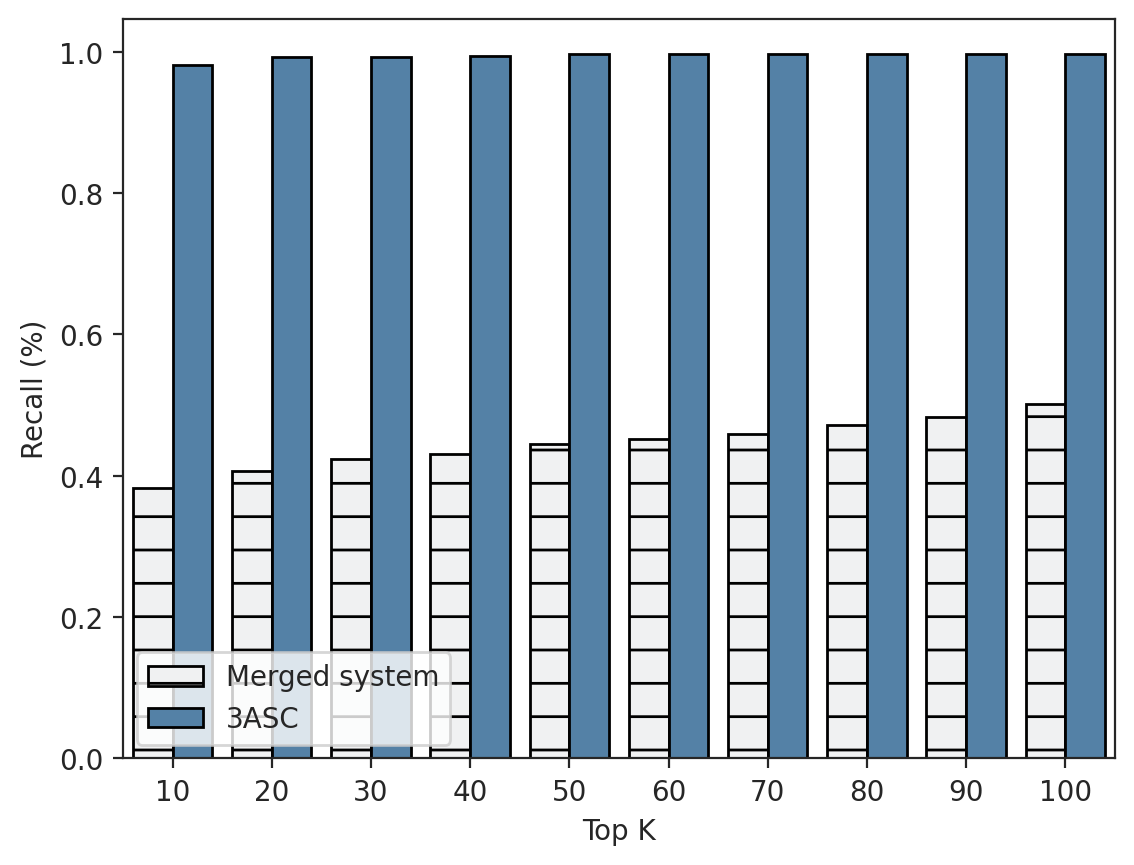

In [ ]:
from results.revision.revision_utils import get_combination_topk

ks = [k for k in range(10, 101, 10)]
performance_combination = np.zeros(shape=(len(ks), ))
performance_3asc = np.zeros_like(performance_combination)

sample_ids = exomiser_dfs.keys() & lirical_dfs.keys()
for i, k in enumerate(ks):
    performance_combination[i] = get_combination_topk(
        exomiser_dfs, 
        lirical_dfs, 
        k=k, 
        patient_dataset=ad_patients
    )
    
    n_hits = 0
    for sample_id in sample_ids:
        res_idx = fold_results["test_ids"][fold-1].index(sample_id)
        probs = fold_results["fold_instance_y_probs"][fold-1][res_idx]
        labels = fold_results["fold_instance_y_trues"][fold-1][res_idx]
        if topk_recall(probs, labels, k=k):
            n_hits += 1
    
    performance_3asc[i] = n_hits / len(sample_ids)

print("For AD patient")
print(performance_combination)
print(performance_3asc)

figure_data = pd.DataFrame(
    {
    "topk": np.concatenate([performance_combination, performance_3asc]),
    "Tool": ["Merged system"] * len(performance_combination) + ["3ASC"] * len(performance_3asc) ,
    "rank": ks * 2,
    }
)
legend_order = ["Merged system", "3ASC"]
fig, axes = plt.subplots(dpi=200)
bar = sns.barplot(
    figure_data, 
    x="rank", 
    y="topk", 
    hue="Tool", 
    hue_order=legend_order,
    color="steelblue", 
    edgecolor="k", 
    ax=axes,
)

axes.set(xlabel="Top K", ylabel="Recall (%)")


# Loop over the bars
hatches = ['-', '+', 'x', '\\', '*', 'o']
for i, thisbar in enumerate(bar.patches, start=1):
    # Set a different hatch for each bar
    if i <= len(ks):
        thisbar.set_hatch("-")

    if i > len(ks):
        continue
        # thisbar.set_hatch("//")
    if i > len(ks)*2:
        continue

plt.legend(loc="lower left")
plt.savefig("results/2_9_benchmark_ad_comnination.png")